In [1]:
import pandas as pd

In [99]:
data = pd.read_csv('us-counties.csv')
data['date'] = data['date'].astype('datetime64')
data = data.loc[data['date'] < '2020-06-02']
data

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
200893,2020-06-01,USA-66999,Unknown,Guam,0,1.29,NaN,0,0.0,NaN
200894,2020-06-01,USA-78999,Unknown,Virgin Islands,0,0.00,NaN,0,0.0,NaN
200895,2020-06-01,USA-78030,St. Thomas,Virgin Islands,0,0.00,0.00,0,0.0,0.0
200896,2020-06-01,USA-78020,St. John,Virgin Islands,0,0.00,0.00,0,0.0,0.0


In [100]:
pivot = data.pivot_table(index = 'state',values = ['deaths'],aggfunc = 'sum')
pivot

,deaths
state,
Alabama,646
Alaska,8
Arizona,918
Arkansas,133
California,4287
Colorado,1458
Connecticut,3964
Delaware,368
District of Columbia,468


In [101]:
pivot['population'] = pd.Series([4917000,731000,7292000,3049000,39540000,5774000,3606000,990000,712816,21538000,10712000,1627420,455000,1839000,12813000,6785000,3190000,2938000,4505000,4649000,1362000,6177000,7030000,10077000,5706000,2961000,6155000,1084000,1962000,3139000,1378000,9289000,2117000,20201000,10612000,7790000,50000,11799000,3987000,4237000,13002000,3624000,1097000,5118000,886000,6910000,29145000,3272000,8626000,105870,8626000,7694000,1794000,5894000,5768000],index = pivot.index)
pivot['ratio'] = pivot['deaths']/pivot['population']*100
pivot_1 = pivot.drop('population',axis = 1)
pivot_1

,deaths,ratio
state,,
Alabama,646,0.013138
Alaska,8,0.001094
Arizona,918,0.012589
Arkansas,133,0.004362
California,4287,0.010842
Colorado,1458,0.025251
Connecticut,3964,0.109928
Delaware,368,0.037172
District of Columbia,468,0.065655


In [56]:
from sklearn.cluster import KMeans

In [102]:
model = KMeans(n_clusters = 3,random_state = 12345)
scaler = StandardScaler()
scaler.fit(pivot[['deaths','ratio']])
pivot_1[['deaths_s','ratio_s']] = scaler.transform(pivot_1[['deaths','ratio']])
pivot
model.fit(pivot_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=12345)

In [103]:
centroids = pd.DataFrame(model.cluster_centers_, columns=pivot_1.columns)
pivot_1['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
data_all = pd.concat([pivot_1, centroids],ignore_index = True)


In [104]:
data_all

,deaths,ratio,deaths_s,ratio_s,label
0,646.000000,0.013138,-0.287167,-0.335513,0
1,8.000000,0.001094,-0.430948,-0.707903,0
2,918.000000,0.012589,-0.225869,-0.352487,0
3,133.000000,0.004362,-0.402778,-0.606866,0
4,4287.000000,0.010842,0.533372,-0.406502,2
5,1458.000000,0.025251,-0.104174,0.039020,0
6,3964.000000,0.109928,0.460581,2.657217,2
7,368.000000,0.037172,-0.349818,0.407604,0
8,468.000000,0.065655,-0.327282,1.288307,0
9,2459.000000,0.011417,0.121412,-0.388728,0


In [105]:
import seaborn as sns

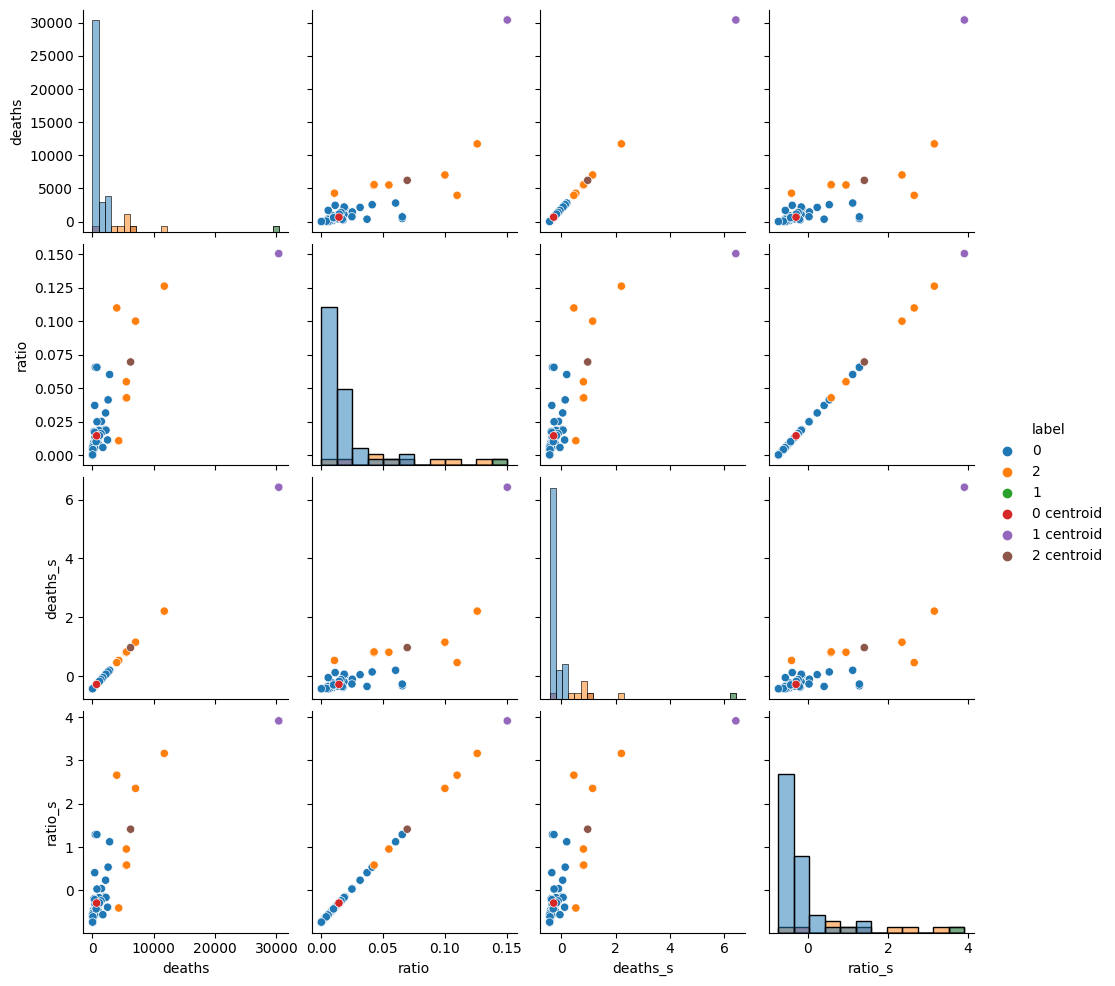

In [106]:
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
# Дополнительный слой для центроидов
# Сформируйте таблицу для дополнительного слоя
centroids_init = pd.DataFrame(columns = pivot_1.drop(columns = ['label']).columns)# < напишите код здесь >
# Сформируйте "заглушку"
centroids_init['label'] = 4
pairgrid.data = centroids_init# < напишите код здесь >
pairgrid.map_offdiag(func = sns.scatterplot, s = 200, marker = '*', palette = 'flag')

In [108]:
data_all_wc = data_all.loc[0:data_all.shape[0]-4,:]
data_all_wc = data_all_wc.set_index(pivot.index)

In [109]:
#print(data_all_wc[data_all_wc['label']=='3']['ratio'].max(),' ', data_all_wc[data_all_wc['label']=='3']['ratio'].min(),'\n')

print(data_all_wc[data_all_wc['label']=='2']['ratio'].max(),' ', data_all_wc[data_all_wc['label']=='2']['ratio'].min(),'\n')
print(data_all_wc[data_all_wc['label']=='1']['ratio'].max(),' ', data_all_wc[data_all_wc['label']=='1']['ratio'].min(),'\n')
print(data_all_wc[data_all_wc['label']=='0']['ratio'].max(),' ', data_all_wc[data_all_wc['label']=='0']['ratio'].min())


0.12618150500592096   0.010842185128983309 

0.1504677986238305   0.1504677986238305 

0.06565509191712868   0.0


KeyError: ignored

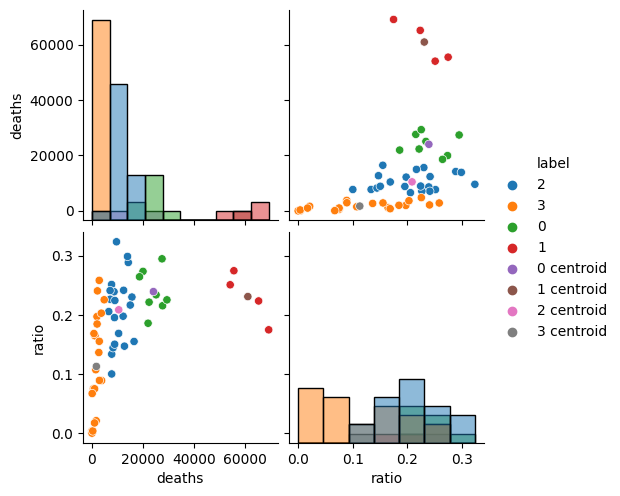

In [ ]:
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
# Дополнительный слой для центроидов
# Сформируйте таблицу для дополнительного слоя
centroids_init = pd.DataFrame(columns = pivot.drop(columns = ['label']).columns)# < напишите код здесь >
# Сформируйте "заглушку"
centroids_init['label'] = 4
pairgrid.data = centroids_init# < напишите код здесь >
pairgrid.map_offdiag(func = sns.scatterplot, s = 200, marker = '*', palette = 'flag')

In [73]:
!pip install fuzzy-c-means

In [21]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()
scaler.fit(pivot[['deaths','ratio']])
pivot[['deaths_s','ratio_s']] = scaler.transform(pivot[['deaths','ratio']])
pivot

,deaths,population,ratio,deaths_s,ratio_s
state,,,,,
Alabama,646,4917000,0.013138,-0.287167,-0.335513
Alaska,8,731000,0.001094,-0.430948,-0.707903
Arizona,918,7292000,0.012589,-0.225869,-0.352487
Arkansas,133,3049000,0.004362,-0.402778,-0.606866
California,4287,39540000,0.010842,0.533372,-0.406502
Colorado,1458,5774000,0.025251,-0.104174,0.039020
Connecticut,3964,3606000,0.109928,0.460581,2.657217
Delaware,368,990000,0.037172,-0.349818,0.407604
District of Columbia,468,712816,0.065655,-0.327282,1.288307


In [111]:
pivot['deaths'] = pivot['deaths'].astype('float32')
pivot['ratio'] = pivot['ratio'].astype('float32')

In [112]:
import numpy as np
from fcmeans import FCM
pivot_2 = pivot.drop(['population','deaths','ratio'],axis = 1)
my_model = FCM(n_clusters=3) # we use two cluster as an example
my_model.fit(pivot_2.to_numpy()) ## X, numpy array. rows:samples columns:features

In [113]:

predicted_clusters = my_model.predict(pivot_2.to_numpy())
predicted_clusters

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [114]:
pivot['label'] = predicted_clusters

In [115]:
pivot

,deaths,population,ratio,deaths_s,ratio_s,label
state,,,,,,
Alabama,646.0,4917000,0.013138,-0.287167,-0.335513,2
Alaska,8.0,731000,0.001094,-0.430948,-0.707903,2
Arizona,918.0,7292000,0.012589,-0.225869,-0.352487,2
Arkansas,133.0,3049000,0.004362,-0.402778,-0.606866,2
California,4287.0,39540000,0.010842,0.533372,-0.406502,2
Colorado,1458.0,5774000,0.025251,-0.104174,0.039020,2
Connecticut,3964.0,3606000,0.109928,0.460581,2.657217,1
Delaware,368.0,990000,0.037172,-0.349818,0.407604,2
District of Columbia,468.0,712816,0.065655,-0.327282,1.288307,1


In [118]:
print(pivot[pivot['label']==2]['ratio'].max(),' ', pivot[pivot['label']==2]['ratio'].min(),'\n',pivot[pivot['label']==2]['ratio'].unique(),'\n')

print(pivot[pivot['label']==1]['ratio'].max(),' ', pivot[pivot['label']==1]['ratio'].min(),'\n',pivot[pivot['label']==1]['ratio'].unique(),'\n')
print(pivot[pivot['label']==0]['ratio'].max(),' ', pivot[pivot['label']==0]['ratio'].min(),'\n',pivot[pivot['label']==0]['ratio'].unique(),'\n')


0.037171718   0.0 
 [0.01313809 0.00109439 0.01258914 0.00436209 0.01084219 0.02525113
 0.03717172 0.01141703 0.01920276 0.00036868 0.00373626 0.00451332
 0.03156964 0.01749216 0.00738598 0.00987791 0.00653451 0.01857694
 0.02495779 0.01277011 0.00166052 0.00932722 0.0135712  0.01777939
 0.01709967 0.0086977  0.00082157 0.004      0.0186965  0.00837723
 0.00363465 0.         0.00976944 0.00699774 0.00522431 0.00581575
 0.00345355 0.00063761 0.00566733 0.01613726 0.01472576 0.00423634
 0.01012895 0.00029473] 

0.1261815   0.041314553 
 [0.1099279  0.06565509 0.04259736 0.06024951 0.04131455 0.10007112
 0.05482782 0.1261815  0.04287033 0.06563354] 

0.1504678   0.1504678 
 [0.1504678] 



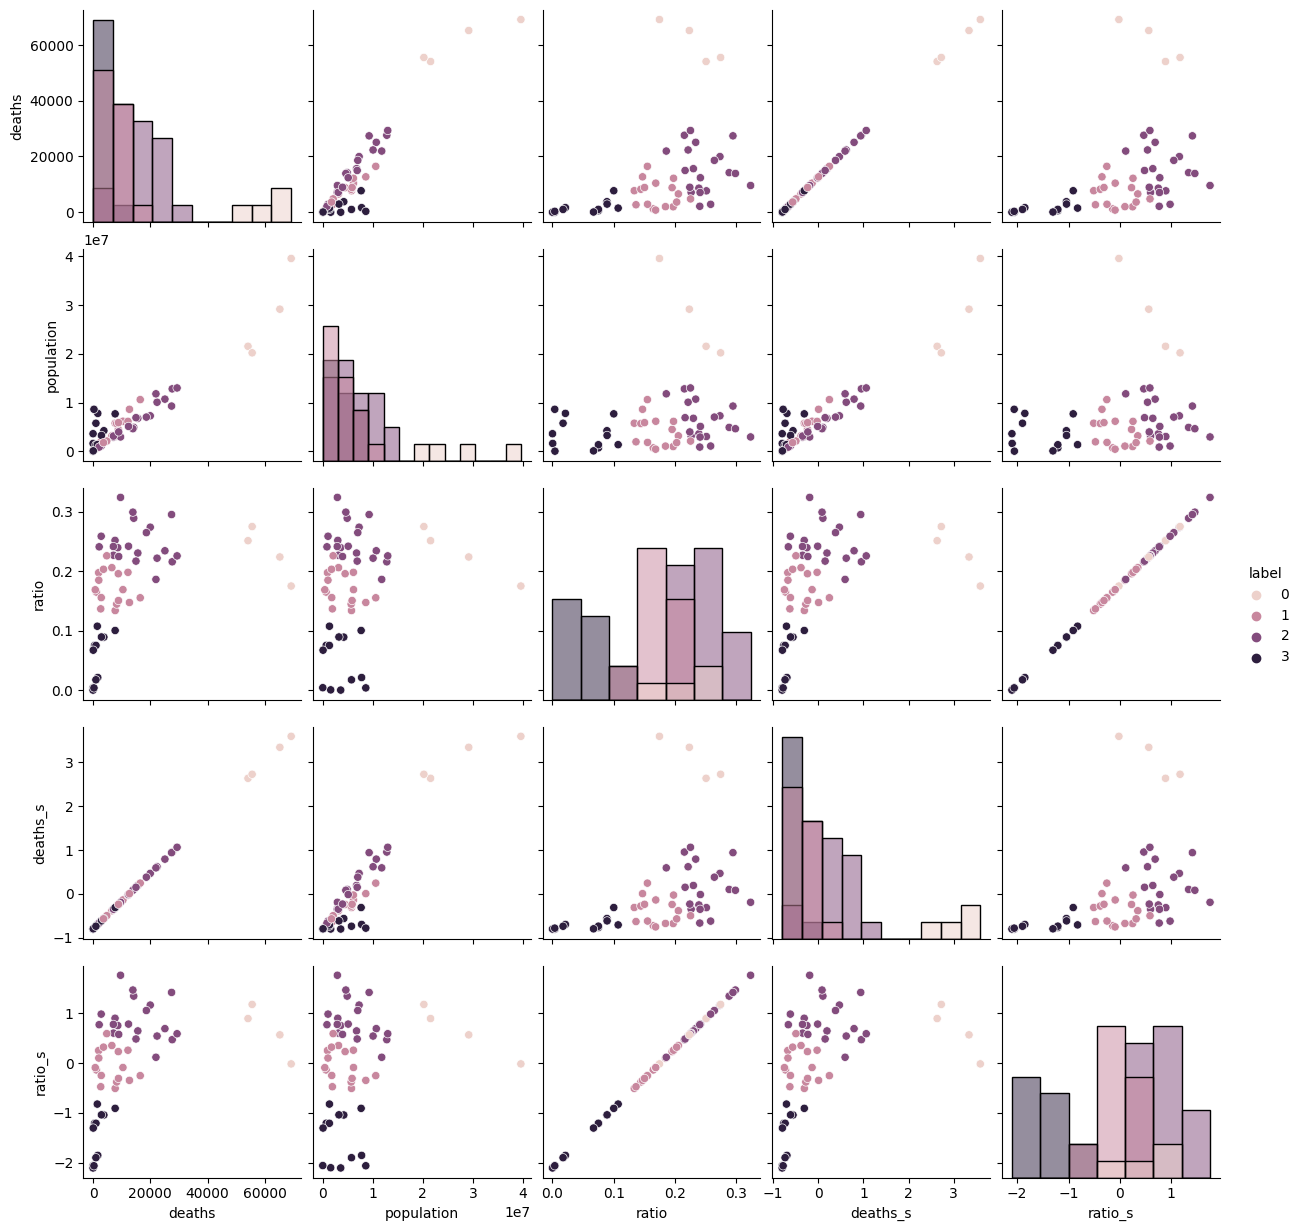

In [ ]:
pairgrid = sns.pairplot(pivot, hue='label', diag_kind='hist')
# Дополнительный слой для центроидов
# Сформируйте таблицу для дополнительного слоя
centroids_init = pd.DataFrame(columns = pivot.drop(columns = ['label']).columns)# < напишите код здесь >
# Сформируйте "заглушку"
centroids_init['label'] = 4
pairgrid.data = centroids_init
pairgrid.map_offdiag(func = sns.scatterplot, s = 200, marker = '*', palette = 'flag')